In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
total_ag = pd.read_csv("/Users/varshamadapoosi/Downloads/archive/Land and Agriculture/Agricultural Land.csv")
total_ag

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),Unnamed: 8
0,Afghanistan,379 100,-0.3,58.1,77 850,1 250,300 000,20 920,NaN
1,Albania,11 873,5.9,43.3,6 171,792,4 910,2 053,NaN
2,Algeria,414 316,7.1,17.4,74 962,9 390,329 964,10 895,NaN
3,American Samoa,49,63.3,24.5,30,19,...,...,NaN
4,Andorra,208,9.5,44.3,29,...,179,...,NaN
...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna Islands,60,0.0,42.9,10,50,...,...,NaN
221,Western Sahara,50 040,0.0,18.8,40,...,50 000,...,NaN
222,Yemen,235 460,-0.3,44.6,12 480,2 980,220 000,...,NaN
223,Zambia,237 360,14.1,31.9,37 000,360,200 000,...,NaN


In [3]:
protected_land = pd.read_csv("/Users/varshamadapoosi/Downloads/archive/Land and Agriculture/Terrestrial protected areas.csv")

protected_land




,CountryID,Country and area,latest year available,Terrestrial protected areas
0,NaN,NaN,NaN,% of total land area
1,NaN,World Total,2018.0,14.7
2,4.0,Afghanistan,2018.0,0.1
3,8.0,Albania,2018.0,17.7
4,12.0,Algeria,2018.0,7.5
...,...,...,...,...
208,862.0,Venezuela (Bolivarian Republic of),2018.0,54.1
209,704.0,Viet Nam,2018.0,7.6
210,887.0,Yemen,2018.0,0.8
211,894.0,Zambia,2018.0,37.9


In [4]:
#global south countries basedon https://worldpopulationreview.com/country-rankings/global-south-countries

In [5]:
south  = pd.read_csv("/Users/varshamadapoosi/Downloads/csvData.csv")

south.columns


Index(['country', 'pop2021'], dtype='object')

In [6]:
lst = []
for country in total_ag["Country"]:
    if country in south["country"]:
        lst.append("Global South")
    else:
        lst.append("Global North")

In [7]:
merged = total_ag.merge(protected_land, left_on="Country", right_on="Country and area", how="inner").drop(columns=["Unnamed: 8"])



In [8]:
lst = []
for country in merged["Country"]:
    if country in list(south["country"]):
        lst.append("Global South")
    else:
        lst.append("Global North")

In [9]:
merged["type"] = lst

In [10]:
merged['Agricultural area in 2013 (km2)'] = merged['Agricultural area in 2013 (km2)'].str.replace("...","")
merged['% change of agricultural area since 1990'] = merged['% change of agricultural area since 1990'].str.replace("...","")
merged['% of total land area covered by agricultural area in 2013'] = merged['% of total land area covered by agricultural area in 2013'].str.replace("...","")


merged['Arable land in 2013 (km2)'] = merged['Arable land in 2013 (km2)'].str.replace("...","")

merged['Permanent crops in 2013 (km2)'] = merged['Permanent crops in 2013 (km2)'].str.replace("...","")
merged['Permanent meadows and pastures in 2013 (km2)'] = merged['Permanent meadows and pastures in 2013 (km2)'].str.replace("...","")

merged['Agricultural area actually irrigated in 2013 (km2)'] = merged['Agricultural area actually irrigated in 2013 (km2)'].str.replace("...","")


merged['Agricultural area actually irrigated in 2013 (km2)'] = merged['Agricultural area actually irrigated in 2013 (km2)'].str.replace("..","")




In [11]:
merged['Agricultural area in 2013 (km2)'] = merged['Agricultural area in 2013 (km2)'].str.replace(" ","")

merged['Arable land in 2013 (km2)'] = merged['Arable land in 2013 (km2)'].str.replace(" ","")

merged['Permanent crops in 2013 (km2)'] = merged['Permanent crops in 2013 (km2)'].str.replace(" ","")
merged['Permanent meadows and pastures in 2013 (km2)'] = merged['Permanent meadows and pastures in 2013 (km2)'].str.replace(" ","")

merged['Agricultural area actually irrigated in 2013 (km2)'] = merged['Agricultural area actually irrigated in 2013 (km2)'].str.replace(" ","")




In [12]:
merged['Agricultural area actually irrigated in 2013 (km2)'].values

array(['', '3', '', '', '', '', '', '', '2', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '…', '', '', '6', '', '', '', '', '', '',
       '', '', '', '', '', '', '0', '', '', '', '', '3', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '3', '', '', '', '', '', '', '', '', '', '', '', '4', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '8', '', '', '',
       '', '9', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', ''], dtype=object)

In [13]:

merged['Agricultural area in 2013 (km2)'] = pd.to_numeric(merged['Agricultural area in 2013 (km2)'])
merged['% change of agricultural area since 1990']= pd.to_numeric(merged['% change of agricultural area since 1990'])
merged['% of total land area covered by agricultural area in 2013'] =  pd.to_numeric(merged['% of total land area covered by agricultural area in 2013'])
merged['Arable land in 2013 (km2)'] = pd.to_numeric(merged['Arable land in 2013 (km2)'])
merged['Permanent crops in 2013 (km2)']  = pd.to_numeric(merged['Permanent crops in 2013 (km2)'])
merged['Permanent meadows and pastures in 2013 (km2)'] = pd.to_numeric(merged['Permanent meadows and pastures in 2013 (km2)'])
merged['Terrestrial protected areas']= pd.to_numeric(merged[ 'Terrestrial protected areas'])


In [14]:
merged.drop(columns =["CountryID", "latest year available"]).groupby("type").std()

,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Terrestrial protected areas
type,,,,,,,
Global North,31.412577,3.564333,2.852015,33.752887,21.437323,31.386480,17.148866
Global South,32.389021,3.088031,2.938465,28.629214,26.941874,24.227193,11.798598


In [15]:
merged['type'] = merged['type'].astype('category').cat.codes
merged

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,latest year available,Terrestrial protected areas,type
0,Afghanistan,NaN,3.0,1.0,50.0,0.0,NaN,,4.0,Afghanistan,2018.0,0.1,1
1,Albania,73.0,NaN,3.0,1.0,NaN,0.0,3,8.0,Albania,2018.0,17.7,1
2,Algeria,NaN,NaN,4.0,62.0,0.0,NaN,,12.0,Algeria,2018.0,7.5,1
3,American Samoa,49.0,3.0,5.0,30.0,19.0,NaN,,16.0,American Samoa,2018.0,15.8,1
4,Andorra,NaN,NaN,3.0,29.0,NaN,NaN,,20.0,Andorra,2018.0,26.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela (Bolivarian Republic of),NaN,2.0,5.0,0.0,0.0,NaN,,862.0,Venezuela (Bolivarian Republic of),2018.0,54.1,0
198,Viet Nam,NaN,7.0,1.0,95.0,22.0,0.0,,704.0,Viet Nam,2018.0,7.6,0
199,Yemen,NaN,3.0,6.0,80.0,0.0,NaN,,887.0,Yemen,2018.0,0.8,1
200,Zambia,NaN,1.0,9.0,0.0,NaN,NaN,,894.0,Zambia,2018.0,37.9,1


In [16]:
X_cols = ["Agricultural area in 2013 (km2)", "% change of agricultural area since 1990", 'Arable land in 2013 (km2)', '% of total land area covered by agricultural area in 2013', 'Permanent meadows and pastures in 2013 (km2)','type' ] # Columns used for prediction
y_col = 'Terrestrial protected areas' # The column we're trying to predict

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(merged.copy().dropna(), test_size=0.3, random_state=102)
X = train[X_cols] # TODO: fill in
y = train[y_col] # TODO: fill in

In [18]:

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X,y) # TODO: fill in
linear_model.predict(X)

train["linear_pred"] = linear_model.predict(X) # TODO: fill in
test["linear_pred"] = linear_model.predict(test[X_cols]) # TODO: fill in

train_rmse_lin = np.mean((train["linear_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
test_rmse_lin = np.mean((test["linear_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

print("Training set error for linear model:", train_rmse_lin)
print("Test set error for linear model:    ", test_rmse_lin)




Training set error for linear model: 9.372878499385795
Test set error for linear model:     15.029909770360158


In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor() # TODO: fill in
tree_model.fit(X,y) # TODO: fill in

train["tree_pred"] = tree_model.predict(X) # TODO: fill in
test["tree_pred"] = tree_model.predict(test[X_cols]) # TODO: fill in


train_rmse_tree = np.mean((train["tree_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
test_rmse_tree = np.mean((test["tree_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

print("Training set error for decision tree:", train_rmse_tree)
print("Test set error for decision tree:    ", test_rmse_tree)



Training set error for decision tree: 0.0
Test set error for decision tree:     23.145468828103855


In [20]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

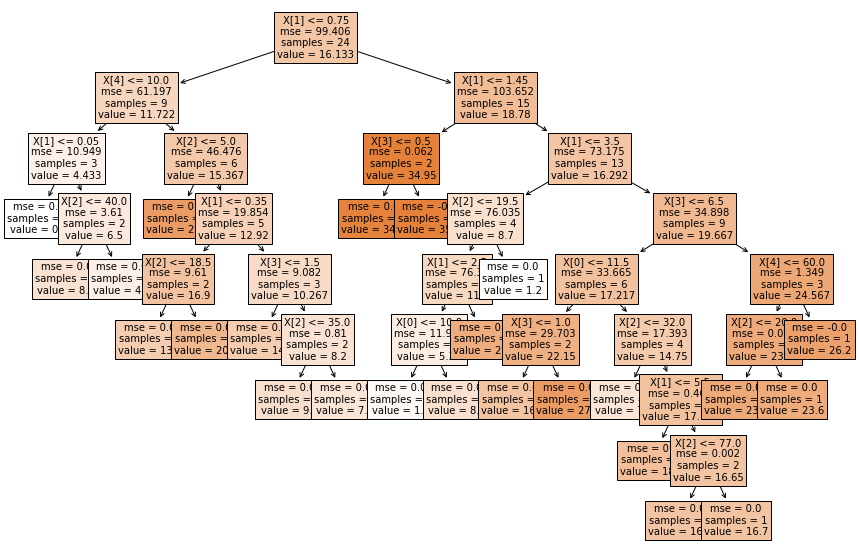

In [21]:
# plot tree
plt.figure(figsize=(15,10))  # set plot size (denoted in inches)
tree.plot_tree(tree_model, fontsize=10, filled=True)
plt.show()

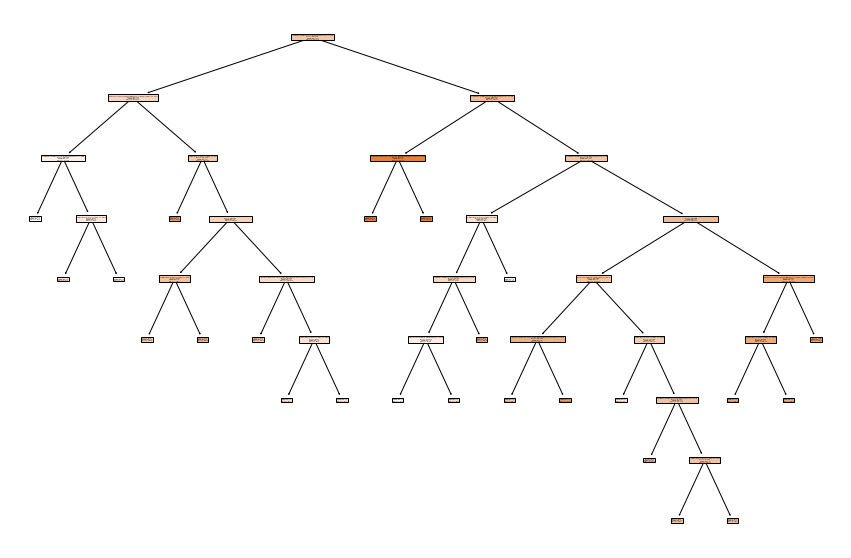

In [22]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_model, 
                   feature_names= X_cols,  
                   class_names=y_col,
                   filled=True)



In [23]:
#initial

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_features = 1) # TODO: fill in
forest_model.fit(X,y) # TODO: fill in

train["forest_pred"] = forest_model.predict(X) # TODO: fill in
test["forest_pred"] = forest_model.predict(test[X_cols]) # TODO: fill in

train_rmse_forest = np.mean((train["forest_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
test_rmse_forest = np.mean((test["forest_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

print("Training set error for random forest:", train_rmse_forest)
print("Test set error for random forest:    ", test_rmse_forest)



Training set error for random forest: 4.641018207247199
Test set error for random forest:     16.481670259577896


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#trial runs

In [26]:
def trial_runs_forest_maxd(max_d):
    
    forest_model = RandomForestRegressor(max_depth  = max_d); # TODO: fill in
    forest_model.fit(X,y) # TODO: fill in

    train["forest_pred"] = forest_model.predict(X) # TODO: fill in
    test["forest_pred"] = forest_model.predict(test[X_cols]) # TODO: fill in

    train_rmse_forest = np.mean((train["forest_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
    test_rmse_forest = np.mean((test["forest_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

    return train_rmse_forest, test_rmse_forest
    print("Training set error for random forest:", train_rmse_forest)
    print("Test set error for random forest:    ", test_rmse_forest)




In [27]:
max_depth_train_lst= []
max_depth_test_lst = []
for i in range(1,10):
    max_depth_train_lst.append(trial_runs_forest_maxd(max_d = i)[0]);
    max_depth_test_lst.append(trial_runs_forest_maxd(max_d = i)[1]);



/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

In [28]:
def trial_runs_forest_mss(mss):
    
    forest_model = RandomForestRegressor(min_samples_split  = mss) # TODO: fill in
    forest_model.fit(X,y) # TODO: fill in

    train["forest_pred"] = forest_model.predict(X) # TODO: fill in
    test["forest_pred"] = forest_model.predict(test[X_cols]) # TODO: fill in

    train_rmse_forest = np.mean((train["forest_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
    test_rmse_forest = np.mean((test["forest_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

    return train_rmse_forest, test_rmse_forest
    print("Training set error for random forest:", train_rmse_forest)
    print("Test set error for random forest:    ", test_rmse_forest)




In [29]:
mss_train_lst= []
mss_test_lst = []
mss_train_lst.append(np.inf)
mss_test_lst.append(np.inf)

for i in range(2,10):
    mss_train_lst.append(trial_runs_forest_mss(mss = i)[0]);
    mss_test_lst.append(trial_runs_forest_mss(mss = i)[1]);



/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

In [30]:
def trial_runs_forest_msl(msl):
    
    forest_model = RandomForestRegressor(min_samples_leaf  = msl) # TODO: fill in
    forest_model.fit(X,y) # TODO: fill in

    train["forest_pred"] = forest_model.predict(X) # TODO: fill in
    test["forest_pred"] = forest_model.predict(test[X_cols]) # TODO: fill in

    train_rmse_forest = np.mean((train["forest_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
    test_rmse_forest = np.mean((test["forest_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

    return train_rmse_forest, test_rmse_forest
    print("Training set error for random forest:", train_rmse_forest)
    print("Test set error for random forest:    ", test_rmse_forest)




In [31]:
msl_train_lst= []
msl_test_lst = []
for i in range(1,10):
    msl_train_lst.append(trial_runs_forest_msl(msl = i)[0]);
    msl_test_lst.append(trial_runs_forest_msl(msl = i)[1]);



/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

In [32]:
df_rf_train = pd.DataFrame()
df_rf_test = pd.DataFrame()

In [33]:
df_rf_train["max_depth_train"] = max_depth_train_lst
df_rf_test["max_depth_test"] = max_depth_test_lst

df_rf_train["min_sample_split_train"] = mss_train_lst
df_rf_test["min_sample_split_test"] = mss_test_lst

df_rf_train["min_sample_leaf_train"] = msl_train_lst
df_rf_test["min_sample_leaf_test"] = msl_test_lst


In [34]:
df_rf_train

,max_depth_train,min_sample_split_train,min_sample_leaf_train
0,8.918482,inf,6.048340
1,7.873682,5.582983,6.163233
2,6.084651,5.329035,7.988294
3,6.207342,6.172580,8.623113
4,5.772089,6.548142,9.134057
5,5.497480,6.460843,9.515758
6,4.993005,7.595481,9.779790
7,4.896713,7.984009,9.815757
8,5.642868,7.761738,9.946838


In [35]:
df_rf_test

,max_depth_test,min_sample_split_test,min_sample_leaf_test
0,15.145566,inf,16.037397
1,14.680182,19.281125,16.011550
2,18.651865,17.505459,17.187116
3,17.578662,18.016672,15.564775
4,14.733756,16.806749,15.261777
5,16.791276,16.970360,15.420487
6,18.035182,17.797684,15.622551
7,18.239697,17.643157,15.906273
8,16.433137,16.570226,14.926913


In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(max_depth = 6, min_samples_split = 5, min_samples_leaf = 6) # TODO: fill in
forest_model.fit(X,y) # TODO: fill in

train["forest_pred"] = forest_model.predict(X) # TODO: fill in
test["forest_pred"] = forest_model.predict(test[X_cols]) # TODO: fill in

train_rmse_forest = np.mean((train["forest_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
test_rmse_forest = np.mean((test["forest_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

print("Training set error for random forest with tuned parameters:", train_rmse_forest)
print("Test set error for random forest with tuned parameters:    ", test_rmse_forest)



Training set error for random forest with tuned parameters: 9.3266947501759
Test set error for random forest with tuned parameters:     15.75143260022344


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
train

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,latest year available,Terrestrial protected areas,type,linear_pred,tree_pred,forest_pred
179,Togo,0.0,7.0,2.0,0.0,0.0,0.0,,768.0,Togo,2018.0,27.6,1,17.192642,27.6,15.645333
72,Greece,70.0,0.8,1.0,70.0,0.0,0.0,,300.0,Greece,2018.0,35.2,1,16.327048,35.2,16.315241
126,Nepal,10.0,6.0,7.0,40.0,4.0,50.0,,524.0,Nepal,2018.0,23.6,1,20.944570,23.6,20.034103
112,Maldives,79.0,3.0,3.0,39.0,30.0,10.0,,462.0,Maldives,2018.0,1.2,1,16.842706,1.2,16.159077
103,Lesotho,21.0,0.0,2.0,1.0,40.0,0.0,,426.0,Lesotho,2018.0,0.3,1,11.579001,0.3,11.090378
110,Malawi,0.0,3.0,4.0,0.0,0.0,0.0,,454.0,Malawi,2018.0,22.9,1,13.984899,22.9,13.081593
100,Lao People's Democratic Republic,50.0,7.0,1.0,90.0,0.0,0.0,,418.0,Lao People's Democratic Republic,2018.0,16.7,0,17.978886,16.7,19.932696
193,United States Virgin Islands,40.0,0.0,4.0,10.0,10.0,20.0,,850.0,United States Virgin Islands,2018.0,13.8,1,13.045642,13.8,12.418071
29,Bulgaria,50.0,0.9,0.0,90.0,0.0,10.0,,100.0,Bulgaria,2018.0,34.7,1,17.886292,34.7,17.642934
88,Ireland,70.0,0.7,0.0,30.0,10.0,30.0,,372.0,Ireland,2018.0,14.4,1,15.137896,14.4,13.272237


In [38]:
test

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,latest year available,Terrestrial protected areas,type,linear_pred,tree_pred,forest_pred
20,Benin,0.0,2.0,3.0,0.0,0.0,0.0,,204.0,Benin,2018.0,29.6,1,13.132469,1.9,12.027878
55,Ecuador,40.0,2.0,3.0,40.0,90.0,10.0,0,218.0,Ecuador,2018.0,21.7,1,15.970382,1.2,16.416648
130,Nicaragua,50.0,8.0,1.0,40.0,0.0,50.0,,558.0,Nicaragua,2018.0,37.2,1,22.494319,16.6,20.034103
33,Cambodia,0.0,2.0,9.0,50.0,0.0,0.0,,116.0,Cambodia,2018.0,26.0,1,16.223439,1.2,15.088956
82,Hungary,0.0,0.5,0.0,30.0,0.0,0.0,3,348.0,Hungary,2018.0,22.6,1,13.536726,8.4,11.944545
120,Mongolia,9.0,8.0,9.0,4.0,50.0,5.0,,496.0,Mongolia,2018.0,17.7,1,18.710125,23.9,15.645333
128,New Caledonia,2.0,0.6,1.0,62.0,40.0,0.0,,540.0,New Caledonia,2018.0,54.4,1,15.506931,4.6,14.151456
182,Tunisia,30.0,0.0,0.0,30.0,60.0,40.0,0,788.0,Tunisia,2018.0,7.9,1,14.863096,20.0,13.272237
93,Japan,70.0,0.3,4.0,70.0,0.0,0.0,,392.0,Japan,2018.0,29.4,1,16.018653,4.6,15.377741
111,Malaysia,90.0,5.0,9.0,0.0,0.0,0.0,,458.0,Malaysia,2018.0,19.1,1,16.047676,23.9,15.645333


In [39]:
train

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,latest year available,Terrestrial protected areas,type,linear_pred,tree_pred,forest_pred
179,Togo,0.0,7.0,2.0,0.0,0.0,0.0,,768.0,Togo,2018.0,27.6,1,17.192642,27.6,15.645333
72,Greece,70.0,0.8,1.0,70.0,0.0,0.0,,300.0,Greece,2018.0,35.2,1,16.327048,35.2,16.315241
126,Nepal,10.0,6.0,7.0,40.0,4.0,50.0,,524.0,Nepal,2018.0,23.6,1,20.944570,23.6,20.034103
112,Maldives,79.0,3.0,3.0,39.0,30.0,10.0,,462.0,Maldives,2018.0,1.2,1,16.842706,1.2,16.159077
103,Lesotho,21.0,0.0,2.0,1.0,40.0,0.0,,426.0,Lesotho,2018.0,0.3,1,11.579001,0.3,11.090378
110,Malawi,0.0,3.0,4.0,0.0,0.0,0.0,,454.0,Malawi,2018.0,22.9,1,13.984899,22.9,13.081593
100,Lao People's Democratic Republic,50.0,7.0,1.0,90.0,0.0,0.0,,418.0,Lao People's Democratic Republic,2018.0,16.7,0,17.978886,16.7,19.932696
193,United States Virgin Islands,40.0,0.0,4.0,10.0,10.0,20.0,,850.0,United States Virgin Islands,2018.0,13.8,1,13.045642,13.8,12.418071
29,Bulgaria,50.0,0.9,0.0,90.0,0.0,10.0,,100.0,Bulgaria,2018.0,34.7,1,17.886292,34.7,17.642934
88,Ireland,70.0,0.7,0.0,30.0,10.0,30.0,,372.0,Ireland,2018.0,14.4,1,15.137896,14.4,13.272237


In [40]:
#some fu nstuff


In [41]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [42]:

def draw_results(x1, x2, color, plot_title=''):
    plt.figure()
    plt.scatter(x1, x2, c=color, cmap='viridis', alpha=0.7);
    plt.colorbar()
    plt.title(plot_title)
    plt.axis('equal')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.tight_layout()

In [43]:
X.columns

Index(['Agricultural area in 2013 (km2)',
       '% change of agricultural area since 1990', 'Arable land in 2013 (km2)',
       '% of total land area covered by agricultural area in 2013',
       'Permanent meadows and pastures in 2013 (km2)', 'type'],
      dtype='object')

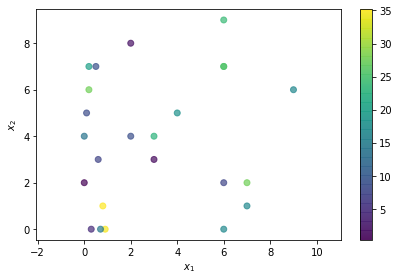

In [44]:
# Import datasets

draw_results(train["% change of agricultural area since 1990"], train['% of total land area covered by agricultural area in 2013'], color=train['Terrestrial protected areas'])





In [45]:
train["% change of agricultural area since 1990"], train['% of total land area covered by agricultural area in 2013']

(179    7.0
 72     0.8
 126    6.0
 112    3.0
 103    0.0
 110    3.0
 100    7.0
 193    0.0
 29     0.9
 88     0.7
 45     0.2
 81     6.0
 31     6.0
 47     9.0
 80     2.0
 170    0.1
 145    0.6
 76     0.2
 51     4.0
 54     6.0
 57     2.0
 27     0.5
 78     6.0
 15     0.3
 Name: % change of agricultural area since 1990, dtype: float64, 179    2.0
 72     1.0
 126    7.0
 112    3.0
 103    2.0
 110    4.0
 100    1.0
 193    4.0
 29     0.0
 88     0.0
 45     6.0
 81     9.0
 31     2.0
 47     6.0
 80     8.0
 170    5.0
 145    3.0
 76     7.0
 51     5.0
 54     7.0
 57     4.0
 27     7.0
 78     0.0
 15     0.0
 Name: % of total land area covered by agricultural area in 2013, dtype: float64)

In [46]:
for col in train:
    print(col)

Country
Agricultural area in 2013 (km2)
% change of agricultural area since 1990
% of total land area covered by agricultural area in 2013
Arable land in 2013 (km2)
Permanent crops in 2013 (km2)
Permanent meadows and pastures in 2013 (km2)
Agricultural area actually irrigated in 2013 (km2)
CountryID
Country and area
latest year available
Terrestrial protected areas
type
linear_pred
tree_pred
forest_pred


In [47]:
from sklearn import preprocessing
from sklearn import utils

/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Error on train set: 0.0
Error on test set: 0.0


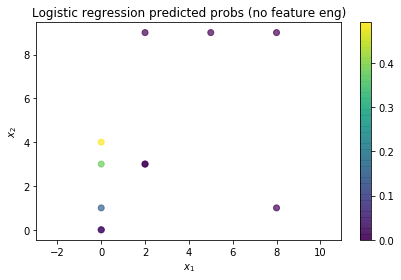

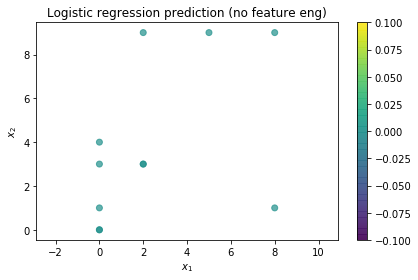

In [48]:
# No need to write any code here: just understand.
from sklearn.linear_model import LogisticRegression

X_train = train[["% change of agricultural area since 1990", '% of total land area covered by agricultural area in 2013']].astype('int').values
y_train = train['Terrestrial protected areas'].astype('int').values

X_test = test[["% change of agricultural area since 1990", '% of total land area covered by agricultural area in 2013']].astype('int').values
y_test = test['Terrestrial protected areas'].astype('int').values

model_simple_features = LogisticRegression(
    penalty='none', solver='lbfgs'
)

model_simple_features.fit(X_test, y_test)

probs = model_simple_features.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

draw_results(
    X_test[:, 0], X_test[:, 1], color=probs, 
    plot_title="Logistic regression predicted probs (no feature eng)"
)
draw_results(
    X_test[:, 0], X_test[:, 1], color=y_hat, 
    plot_title="Logistic regression prediction (no feature eng)"
)
train_error = np.mean(y_train == y_hat)

test_error = np.mean(y_test == y_hat)

print(f"Error on train set: {train_error}")
print(f"Error on test set: {test_error}")




In [49]:
#random features

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def add_random_feature(train_data, test_data):
    # Returns the modified train_data and test_data
    coeffs = np.random.uniform(-1,1,2)
    # This code gives the feature a convenient name
    feat_name = f"σ({coeffs[0]:0.2f}x1 + {coeffs[1]:0.2f}x2)"

    for dataset in (train_data, test_data):
        linear_combination = np.dot(dataset[["% change of agricultural area since 1990", 
                                             '% of total land area covered by agricultural area in 2013']], coeffs)
       
        feature = sigmoid(linear_combination)
        dataset[feat_name] = feature
    return train_data, test_data

train_feats = train.copy()
test_feats = test.copy()
for i in range(10):
    train_feats, test_feats = (
        add_random_feature(train_feats, test_feats)
    )
train_feats.head()

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,...,σ(0.73x1 + 0.88x2),σ(0.99x1 + 0.04x2),σ(0.53x1 + -0.98x2),σ(0.23x1 + -0.08x2),σ(0.54x1 + -0.76x2),σ(-0.45x1 + -0.26x2),σ(0.89x1 + -0.79x2),σ(-0.12x1 + -0.05x2),σ(-0.48x1 + 0.20x2),σ(0.78x1 + -0.16x2)
179,Togo,0.0,7.0,2.0,0.0,0.0,0.0,,768.0,Togo,...,0.998976,0.999128,0.848859,0.811430,0.903194,0.025015,0.990816,0.284465,0.049632,0.994139
72,Greece,70.0,0.8,1.0,70.0,0.0,0.0,,300.0,Greece,...,0.811947,0.698286,0.363081,0.526873,0.418180,0.349710,0.482247,0.464349,0.454788,0.614270
126,Nepal,10.0,6.0,7.0,40.0,4.0,50.0,,524.0,Nepal,...,0.999973,0.998114,0.023591,0.699588,0.109351,0.010754,0.465048,0.259785,0.188282,0.972572
112,Maldives,79.0,3.0,3.0,39.0,30.0,10.0,,462.0,Maldives,...,0.992060,0.957452,0.202714,0.613258,0.338671,0.106206,0.580000,0.377709,0.303275,0.865631
103,Lesotho,21.0,0.0,2.0,1.0,40.0,0.0,,426.0,Lesotho,...,0.852299,0.522100,0.122561,0.461715,0.179771,0.372172,0.172050,0.475761,0.599787,0.421965


In [51]:
test

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,latest year available,Terrestrial protected areas,type,linear_pred,tree_pred,forest_pred
20,Benin,0.0,2.0,3.0,0.0,0.0,0.0,,204.0,Benin,2018.0,29.6,1,13.132469,1.9,12.027878
55,Ecuador,40.0,2.0,3.0,40.0,90.0,10.0,0,218.0,Ecuador,2018.0,21.7,1,15.970382,1.2,16.416648
130,Nicaragua,50.0,8.0,1.0,40.0,0.0,50.0,,558.0,Nicaragua,2018.0,37.2,1,22.494319,16.6,20.034103
33,Cambodia,0.0,2.0,9.0,50.0,0.0,0.0,,116.0,Cambodia,2018.0,26.0,1,16.223439,1.2,15.088956
82,Hungary,0.0,0.5,0.0,30.0,0.0,0.0,3,348.0,Hungary,2018.0,22.6,1,13.536726,8.4,11.944545
120,Mongolia,9.0,8.0,9.0,4.0,50.0,5.0,,496.0,Mongolia,2018.0,17.7,1,18.710125,23.9,15.645333
128,New Caledonia,2.0,0.6,1.0,62.0,40.0,0.0,,540.0,New Caledonia,2018.0,54.4,1,15.506931,4.6,14.151456
182,Tunisia,30.0,0.0,0.0,30.0,60.0,40.0,0,788.0,Tunisia,2018.0,7.9,1,14.863096,20.0,13.272237
93,Japan,70.0,0.3,4.0,70.0,0.0,0.0,,392.0,Japan,2018.0,29.4,1,16.018653,4.6,15.377741
111,Malaysia,90.0,5.0,9.0,0.0,0.0,0.0,,458.0,Malaysia,2018.0,19.1,1,16.047676,23.9,15.645333


In [52]:
train_feats = train.copy()
test_feats = test.copy()
for i in range(10):
    train_feats, test_feats = (
        add_random_feature(train_feats, test_feats)
    )
train_feats.head()

,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,...,σ(0.58x1 + -0.77x2),σ(-0.96x1 + -0.52x2),σ(-0.12x1 + 0.92x2),σ(0.81x1 + -0.61x2),σ(0.58x1 + -0.85x2),σ(0.99x1 + 0.95x2),σ(0.04x1 + 0.71x2),σ(0.93x1 + -0.95x2),σ(-0.18x1 + 0.67x2),σ(-0.53x1 + 0.50x2)
179,Togo,0.0,7.0,2.0,0.0,0.0,0.0,,768.0,Togo,...,0.927471,0.000412,0.733811,0.988421,0.915878,0.999853,0.845832,0.990331,0.518979,0.060625
72,Greece,70.0,0.8,1.0,70.0,0.0,0.0,,300.0,Greece,...,0.425134,0.215395,0.695280,0.510163,0.405097,0.850567,0.678314,0.448305,0.628803,0.518150
126,Nepal,10.0,6.0,7.0,40.0,4.0,50.0,,524.0,Nepal,...,0.132543,0.000080,0.996755,0.647481,0.078993,0.999997,0.994716,0.253691,0.973843,0.573138
112,Maldives,79.0,3.0,3.0,39.0,30.0,10.0,,462.0,Maldives,...,0.364709,0.011465,0.917141,0.647266,0.309571,0.997015,0.905635,0.484478,0.813447,0.474336
103,Lesotho,21.0,0.0,2.0,1.0,40.0,0.0,,426.0,Lesotho,...,0.176917,0.260786,0.862739,0.229311,0.153983,0.869263,0.806868,0.129025,0.793149,0.731119


In [53]:
train_feats


,Country,Agricultural area in 2013 (km2),% change of agricultural area since 1990,% of total land area covered by agricultural area in 2013,Arable land in 2013 (km2),Permanent crops in 2013 (km2),Permanent meadows and pastures in 2013 (km2),Agricultural area actually irrigated in 2013 (km2),CountryID,Country and area,...,σ(0.58x1 + -0.77x2),σ(-0.96x1 + -0.52x2),σ(-0.12x1 + 0.92x2),σ(0.81x1 + -0.61x2),σ(0.58x1 + -0.85x2),σ(0.99x1 + 0.95x2),σ(0.04x1 + 0.71x2),σ(0.93x1 + -0.95x2),σ(-0.18x1 + 0.67x2),σ(-0.53x1 + 0.50x2)
179,Togo,0.0,7.0,2.0,0.0,0.0,0.0,,768.0,Togo,...,0.927471,0.000412,0.733811,0.988421,0.915878,0.999853,0.845832,0.990331,0.518979,0.060625
72,Greece,70.0,0.8,1.0,70.0,0.0,0.0,,300.0,Greece,...,0.425134,0.215395,0.695280,0.510163,0.405097,0.850567,0.678314,0.448305,0.628803,0.518150
126,Nepal,10.0,6.0,7.0,40.0,4.0,50.0,,524.0,Nepal,...,0.132543,0.000080,0.996755,0.647481,0.078993,0.999997,0.994716,0.253691,0.973843,0.573138
112,Maldives,79.0,3.0,3.0,39.0,30.0,10.0,,462.0,Maldives,...,0.364709,0.011465,0.917141,0.647266,0.309571,0.997015,0.905635,0.484478,0.813447,0.474336
103,Lesotho,21.0,0.0,2.0,1.0,40.0,0.0,,426.0,Lesotho,...,0.176917,0.260786,0.862739,0.229311,0.153983,0.869263,0.806868,0.129025,0.793149,0.731119
110,Malawi,0.0,3.0,4.0,0.0,0.0,0.0,,454.0,Malawi,...,0.210208,0.006841,0.965217,0.500235,0.160572,0.998840,0.951495,0.265629,0.895160,0.598065
100,Lao People's Democratic Republic,50.0,7.0,1.0,90.0,0.0,0.0,,418.0,Lao People's Democratic Republic,...,0.965013,0.000693,0.523714,0.993651,0.962293,0.999620,0.728571,0.996256,0.355247,0.037664
193,United States Virgin Islands,40.0,0.0,4.0,10.0,10.0,20.0,,850.0,United States Virgin Islands,...,0.044161,0.110684,0.975313,0.081330,0.032065,0.977880,0.945812,0.021474,0.936316,0.880862
29,Bulgaria,50.0,0.9,0.0,90.0,0.0,10.0,,100.0,Bulgaria,...,0.628392,0.295621,0.473533,0.674280,0.628556,0.709056,0.508758,0.698611,0.459331,0.382025
88,Ireland,70.0,0.7,0.0,30.0,10.0,30.0,,372.0,Ireland,...,0.600748,0.337312,0.479407,0.637820,0.600879,0.666600,0.506812,0.657882,0.468341,0.407555


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Error on test set: 0.0
Error on training set: 0.0


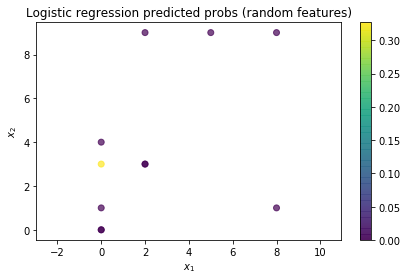

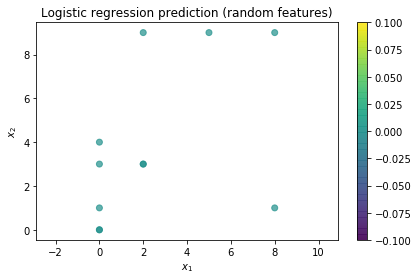

In [54]:
# No need to write any code here: just understand.
X_train = train_feats.replace('...', np.NaN).dropna().drop(columns =["Country", "Country and area","Agricultural area actually irrigated in 2013 (km2)"]).astype(int).iloc[:, 1:].values
y_train = train_feats.replace('...', np.NaN).dropna().drop(columns =["Country", "Country and area", "Agricultural area actually irrigated in 2013 (km2)"])['Terrestrial protected areas'].astype(int).values

X_test = test_feats.replace('...', np.NaN).dropna().drop(columns=["Country", "Country and area", "Agricultural area actually irrigated in 2013 (km2)"]).astype(int).iloc[:, 1:].values
y_test = test_feats.replace('...', np.NaN).dropna().drop(columns=["Country", "Country and area", "Agricultural area actually irrigated in 2013 (km2)"])['Terrestrial protected areas'].astype(int).values

model_features = LogisticRegression(
    penalty='none', solver='lbfgs'
)

model_features.fit(X_train, y_train)

probs = model_features.predict_proba(X_test)[:, 1]
y_hat = (probs > 0.5).astype(np.int64)

draw_results(
    X_test[:, 0], X_test[:, 1], color=probs, 
    plot_title="Logistic regression predicted probs (random features)"
)

draw_results(
    X_test[:, 0], X_test[:, 1], color=y_hat, 
    plot_title="Logistic regression prediction (random features)"
)

accuracy_test = np.mean(y_test == y_hat)
accuracy_train = np.mean(y_train == y_hat)

print(f"Error on test set: {accuracy_test}")

print(f"Error on training set: {accuracy_train}")




In [55]:
# code for the NN
from sklearn.neural_network import MLPRegressor

def tryNN(layers = (6,6,6),max_iter=400,lr = 0.005):
    train, test = train_test_split(merged.dropna(), test_size=0.3, random_state=100)
    X = train[X_cols] # TODO: fill in
    y = train[y_col] # TODO: fill in

    nn_model = MLPRegressor(random_state=2,hidden_layer_sizes=layers,max_iter=400,learning_rate_init=lr) 
    nn_model.fit(X,y) # TODO: fill in

    train["nn_pred"] = nn_model.predict(X) # TODO: fill in
    test["nn_pred"] = nn_model.predict(test[X_cols]) # TODO: fill in

    train_rmse_nn = np.mean((train["nn_pred"] - train['Terrestrial protected areas']) ** 2) ** 0.5
    test_rmse_nn = np.mean((test["nn_pred"] - test['Terrestrial protected areas']) ** 2) ** 0.5

    print("Training set error for nn:", train_rmse_nn)
    print("Test set error for nn:", test_rmse_nn)
    return train_rmse_nn,test_rmse_nn

/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.859177723389399
Test set error for nn: 11.62925454682374


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.980284300772416
Test set error for nn: 10.988929723297758
Training set error for nn: 9.139048346261168
Test set error for nn: 10.217673293254787


Text(0, 0.5, 'Val. Error')

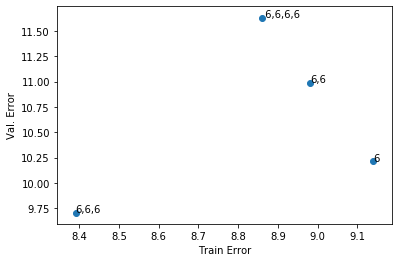

In [56]:
pairs = []
pairs.append(tryNN(layers=(6,6,6,6)))
pairs.append(tryNN(layers=(6,6,6)))
pairs.append(tryNN(layers=(6,6)))
pairs.append(tryNN(layers=(6)))
plt.scatter(*zip(*pairs))
annotations=[" 6,6,6,6","6,6,6","6,6","6"]
for i, label in enumerate(annotations):
    plt.text(pairs[i][0], pairs[i][1],label)
plt.xlabel("Train Error")
plt.ylabel("Val. Error")

In [57]:
print(X)

     Agricultural area in 2013 (km2)  \
179                              0.0   
72                              70.0   
126                             10.0   
112                             79.0   
103                             21.0   
110                              0.0   
100                             50.0   
193                             40.0   
29                              50.0   
88                              70.0   
45                              70.0   
81                              50.0   
31                              30.0   
47                              23.0   
80                               0.0   
170                              0.0   
145                              7.0   
76                               7.0   
51                              90.0   
54                              20.0   
57                              20.0   
27                              70.0   
78                               0.0   
15                              80.0   


In [58]:
tryNN(max_iter=50)
tryNN(max_iter=100)
tryNN(max_iter=200)
tryNN(max_iter=400)

/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418
Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(8.391648083463117, 9.70909950858418)

Training set error for nn: 6.496990636621241
Test set error for nn: 13.839988174035696


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 7.6650013562783474
Test set error for nn: 8.079498150308174


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 11.8896362902409
Test set error for nn: 12.756033072210982
Training set error for nn: 28.919884847858224
Test set error for nn: 23.850716556618174


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Val. Error')

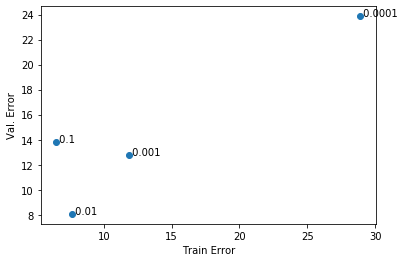

In [59]:
pairs=[]
pairs.append(tryNN(lr=0.1))
pairs.append(tryNN(lr=0.01))
pairs.append(tryNN(lr=0.001))
pairs.append(tryNN(lr=0.0001))
plt.scatter(*zip(*pairs))
annotations=[" 0.1"," 0.01"," 0.001"," 0.0001"]
for i, label in enumerate(annotations):
    plt.text(pairs[i][0], pairs[i][1],label)
plt.xlabel("Train Error")
plt.ylabel("Val. Error")

Training set error for nn: 12.927816868884474
Test set error for nn: 7.550175732941057


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 8.391648083463117
Test set error for nn: 9.70909950858418


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set error for nn: 10.389018688223926
Test set error for nn: 8.668278002080863
Training set error for nn: 9.511137207679258
Test set error for nn: 11.424968505637688


/Users/varshamadapoosi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'Val. Error')

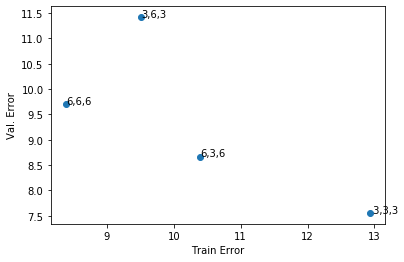

In [60]:
# experimenting with nn architecture
pairs = []
pairs.append(tryNN(layers=(3,3,3)))
pairs.append(tryNN(layers=(6,6,6)))
pairs.append(tryNN(layers=(6,3,6)))
pairs.append(tryNN(layers=(3,6,3)))
plt.scatter(*zip(*pairs))
annotations=[" 3,3,3","6,6,6","6,3,6","3,6,3"]
for i, label in enumerate(annotations):
    plt.text(pairs[i][0], pairs[i][1],label)
plt.xlabel("Train Error")
plt.ylabel("Val. Error")